# <!-- TITLE --> __```Exploration des données + Data Viz```__
<img width="1000px" height="400px" src="images/out.png"></img>

#### __```Importations des modules Python```__

In [1]:
%matplotlib inline 

In [2]:
import random
import pandas as pd  
import numpy  as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import LabelEncoder


#### __```Importations des modules Python externes```__

In [3]:
from modules_python.file_extraction.extraction import read_plant_datasets
from modules_python.config.cmap import color_map as cmap
from modules_python.config.plot_images import plot as plot_img
from modules_python.image_processing.SemanticImage import SemanticImage
from modules_python.plots.plot import hist_hist_plot, hist_bar_plot, hist_pie_plot
from modules_python.image_processing.preprocessing import  filter_selection

#### __```Liste des Couleurs disponibles```__

In [4]:
# liste de couleurs
python_colors = list(mcolors.CSS4_COLORS.keys())

#### __```Liste des Couleurs de mappage```__

In [5]:
# Mappage des couleurs
python_colors_map = cmap().get_cmap_list()

#### __```Définir le chemin d'accès du dataset```__

In [6]:
# Mettre son chemin ici, différent pour tout le monde (Iréné)
PATH = "C:\\Users\\amib\Documents\\Py_Projects\\DS_project\\especes"

#### __```Extraction & Lecture des données```__

[Plus de détails sur les différents paramètres ici](https://github.com/amiehe-essomba/Plant_Seedlings_ds_Project/blob/Plant_Seedlings/details.md)

In [ ]:
# nombres d'espèces de plantes
samples         = 12

# pas
pas             = 1

# extraction de tout le dataset (samples = 12 et pas = 1)
type_indexes    = [x for x in range(0, samples, pas) ]

# type de filtre utilisé
channel_type    = "RGR2-LAB"

# fenêtres de redimensionnement 
reshape         = [(160, 160)]

# format de données
return_as       = "dict"

# verbose
verbose         = 1

# ajout de l'intensité lumineuse sur les 3 canaux
add_contrast    = True 

# début de l'extraction des fichiers
DATA            = read_plant_datasets(
                        path=PATH, 
                        reshape=reshape, 
                        return_as=return_as, 
                        verbose=verbose, 
                        type_indexes=type_indexes, 
                        channel_type=channel_type,
                        add_contrast=add_contrast
                        )

#### __```Chargement des données```__

In [8]:
# selection de la taille des image
shape           = reshape[0]

# extraction & chargement (EL)
data            = DATA[f"{shape[0]}x{shape[1]}"].copy()

In [9]:
# definir la légende (noms des plantes)
legend          = data['feature_names']

# définir les coleurs pour chaque plantes du dataset
colors          = ["blue", 'orange', 'darkgreen', 'darkred', 'm', "c", "lime", "k", "y", "violet", "gold", "darkblue" ]
# le choix des couleurs peut également de faire comme suite 
# colors = random.sample(python_colors, samples) 

#### __```Visualisation des différentes espèces de plantes en RBG et sous Infra-Rouge```__

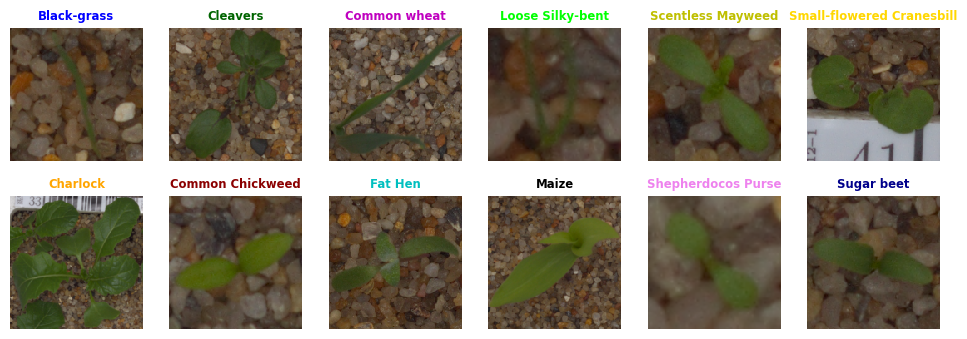

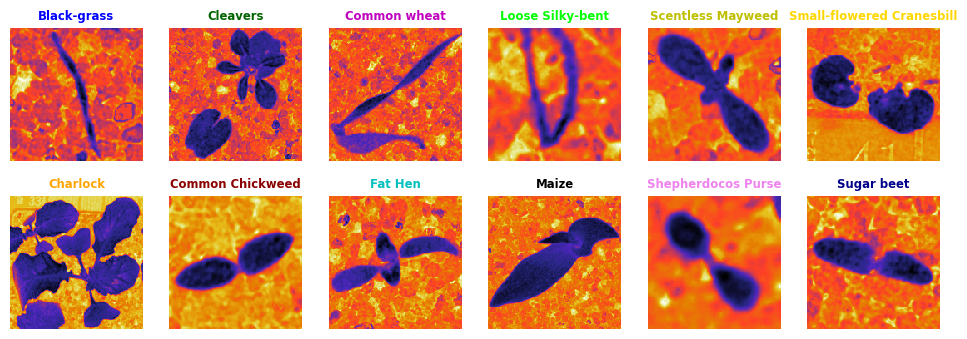

In [10]:
"""
Section de visualisation sur le canal 1.
à Savoir que, pour une bonne représentation des coleurs toutes les images ont 3 canaux (RGB2-LAB)
"""

# choisir l'unique valeur pour toutes les plantes (image uinique)
index           = 10

for s in ['images', 'X']:
    # choisir le canal de couleur (axis=1)
    channel         = 1

    # types d'images {X : RGR2-LAB, images : images réelles}
    type_img        = s

    # indice de la couleur de mappage (2D)
    id_cmap         = 10
    
    # visualisation des images dans l'infra-rouge
    plot_img(
        data        = data, 
        index       = index, 
        channel     = channel, 
        colors      = colors, 
        legend      = legend, 
        type_img    = type_img, 
        cmap        = python_colors_map[id_cmap]
        )


#### __```Analyses des Images```__
##### *[Intialisation des paramètres]()*

In [11]:
# Indices associés à chaque espèces de plantes
id_sel      = [1, 3, 5, 7, 9, 11] # [0, 2, 4, 6, 8, 10]#
# Sous legendes
sub_lengend = [legend[q] for q in id_sel]
# Sous coleurs 
# random.sample(python_colors, k=len(id_sel))
sub_colors  = ["darkblue", 'darkorange', 'green', 'red', 'm', 'skyblue']


##### *[Hauteur & Largeur (n_H x n_L)]()*

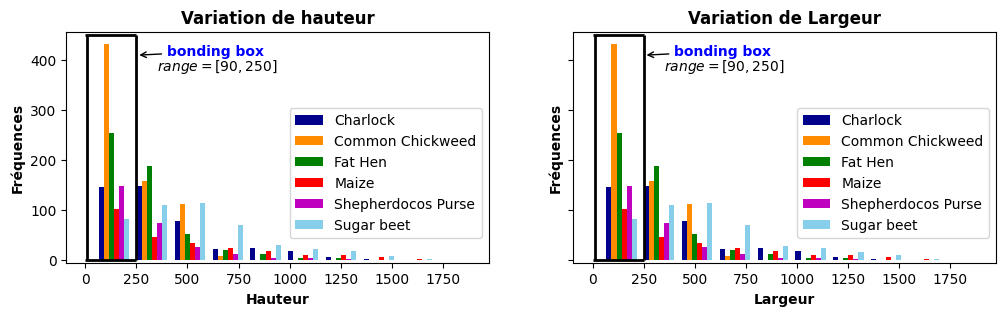

In [12]:

# Hauteurs (n_H)
Hauteus     = [data['height'][i] for i in id_sel]
# Largeurs (n_L)
Largeurs    = [data['width'][i] for i in id_sel] 
# Concatenation
X           = [Hauteus, Largeurs]
# titles 
titles      = ["Variation de hauteur", "Variation de Largeur"]
# xlabels 
xlabel      = ['Hauteur', "Largeur"]
# ylabels 
ylabel      = ["Fréquences", "Fréquences"]
# figsize   
figsize     = (12, 3)
# bonding box coordinates 
coord   : dict = {"x" : [[10, 250], [10, 250]], 
                        "y" : [[0, 450], [0, 450]], "xmin":[0, 0], "ymin":[0, 0],
                        "xmax" : [250, 250], "ymax" :  [450, 450]}

axes        = hist_hist_plot(
    X           = X, 
    legend      = sub_lengend, 
    title       = titles,
    xlabel      = xlabel,
    ylabel      = ylabel,
    colors      = sub_colors, 
    figsize     = figsize, 
    bonding_box = True,
    annot       = True,
    text        = True,
    coord       = coord,
    y_lim       = [-5, 457]
    )

plt.show()

##### *[Pixellisations & Répartition d'espèces]()*

| __Noms d'espèces__                    | __Nombre de plantes par espèce__ |  total|
|---------------------------------------|----------------------------------|------|
| __Black-grass__                       | __309__               |
| __Charlock__                          | __452__               |
| __Cleavers__                          | __335__               |
| __Common Chickweed__                  | __713__               |
| __Common wheat__                      | __253__               |
| __Fat Hen__                           | __538__               |
| __Loose Silky-bent__                  | __762__               |
| __Maize__                             | __257__               |
| __Scentless Mayweed__                 | __607__               |
| __Shepherdoco Purse__                 | __274__               |
| __Small-flowered Cranesbill__         | __576__               |
| __Sugar beet__                        | __463__               | 
|                                       |                       | __```12 espèces```__|

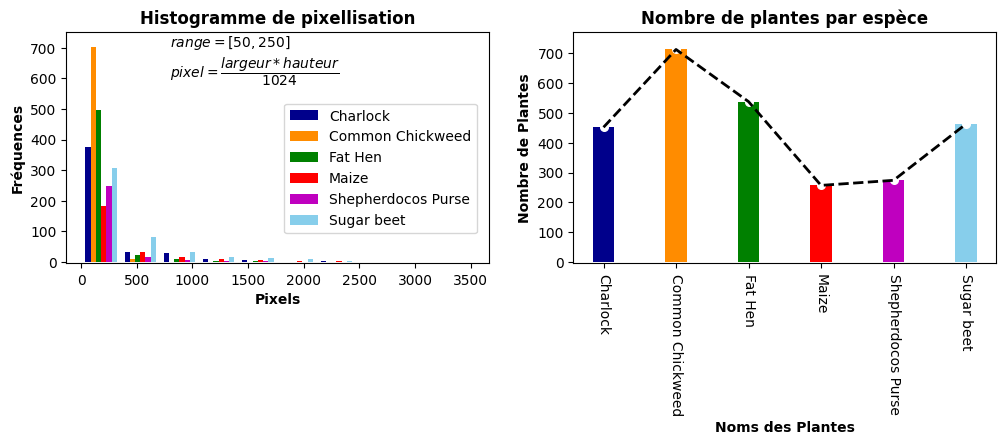

In [13]:
# création d'une Series pour stocker le nombre d'images par espèves
num_of_images   = pd.Series(data = [data['number_of_images'][q] for q in id_sel ], name='spaces').values
# gama
gama            = pd.Series(data = data['number_of_images'], name='spaces').values
# pixels
Pixels          = [data['pixels'][q] for q in id_sel]
# titles 
titles          = ["Histogramme de pixellisation", "Nombre de plantes par espèce"]
# xlabels 
xlabel          = ["Pixels", "Noms des Plantes"]
# ylabels 
ylabel          = ["Fréquences", "Nombre de Plantes"]
# Concatenation
X               = [Pixels, num_of_images]

hist_bar_plot(
    X           = X,
    figsize     = figsize,
    colors      = sub_colors,
    legend      = sub_lengend,
    xlabel      = xlabel,
    ylabel      = ylabel,
    titles      = titles,
    rot         = -90,
    bb_box      = {"x" : 800, "y" : 600},
    legends     = None,
    y_lim       = [[-5, 750], [-5, 770]] 
    )

##### *[Longueur/Hauteur & Canaux RGBA(GRB + canal alpha)]()*

In [14]:
def x_y(widths, heights, size : int = 3):
    # cacul du rapport width / height 
    return [np.array(widths[i]) / np.array(heights[i]) for i in range(size)]

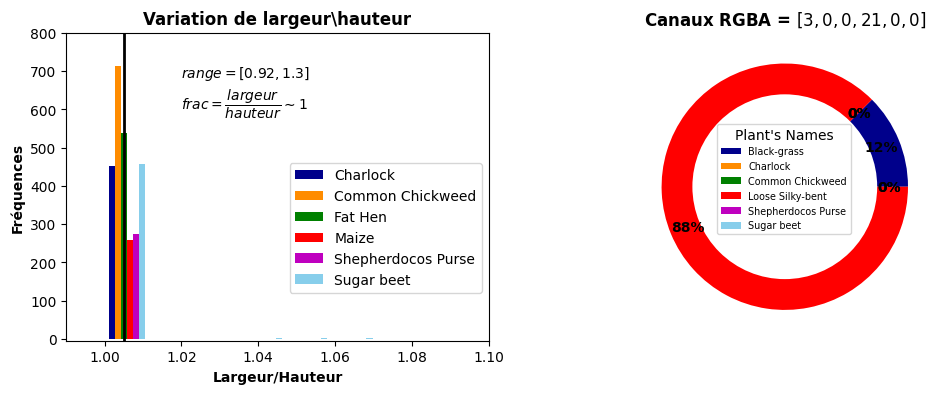

In [20]:
bb_box              = {"x":1.02, "y":600}
# création d'une Series pour stocker le nombre d'images par espèves
X_Y                 = x_y(heights=Hauteus, widths=Largeurs, size=len(sub_lengend))
# pixels
Sobels              = [data['sobels'][q] for q in [0, 1, 3, 6, 9, 11]]
# Sobel_legends 
Sobel_legends       = [legend[q] for q in [0, 1, 3, 6, 9, 11]]
# Concatenation
X                   = [X_Y, Sobels]

if      sum(Sobels) == 0: figsize_=(6, 3)
else:   figsize_    = (12, 4)

hist_pie_plot(
    X       = X,
    legend  = sub_lengend,
    colors  = sub_colors,
    bb_box  = bb_box,
    figsize = figsize_,
    vline   = True,
    xlabel  = ['Largeur/Hauteur', ""],
    ylabel  = ['Fréquences', ""],
    y_lim   = [-5, 800],
    x_lim   = [0.99, 1.1],
    Sobel_legends=Sobel_legends
)

##### *[Histogrammes de couleurs en RGR2-LAB( 3 canaux )]()*

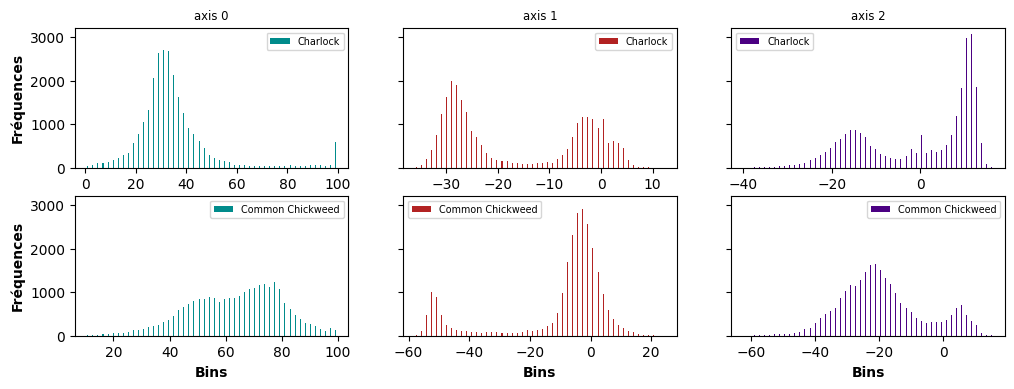

In [18]:
# Selection d'images 
images  =  [data['X'][m][index].astype("float32").copy() for m in id_sel]

# Visualisations graphiques des histogrammes de couleurs sur les 3 axes [0, 1, 2]  
filter_selection(
    img             = images, 
    names           = sub_lengend, 
    color_indexes   = [22, 45, 60], 
    select_index    = [0, 1], 
    figsize         = (12,4), 
    bins            = 50
    )
plt.show()

#### __```Segmentation d'Images Sémantqiues (SIS)```__
Comment effectuer la [Segmentation d'Images Sémantiques]()
* [REF. 1](https://fr.wikipedia.org/wiki/Segmentation_d%27image)
* [REF. 2](https://nanonets.com/blog/semantic-image-segmentation-2020/)
* [REF. 3](https://towardsdatascience.com/semantic-segmentation-popular-architectures-dff0a75f39d0)

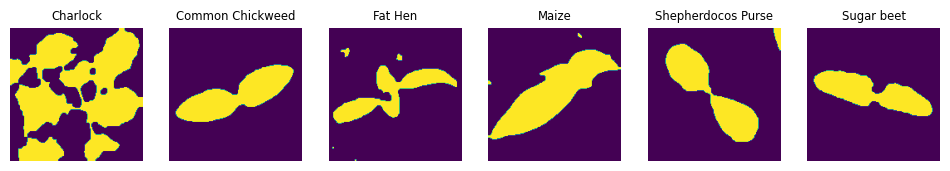

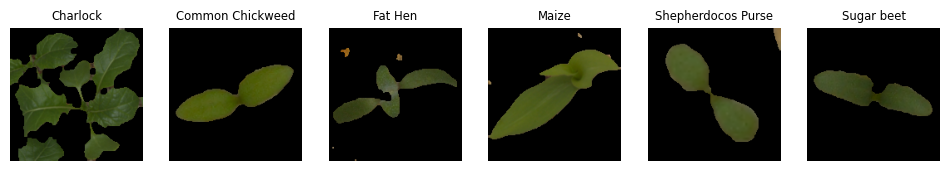

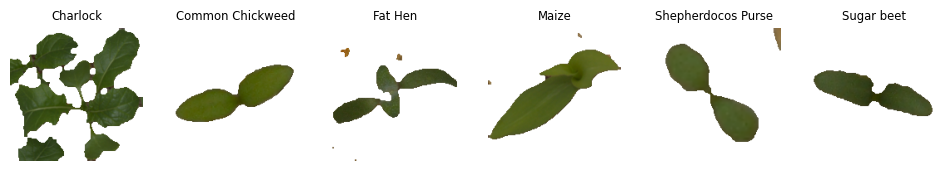

In [17]:
# seuils de valeurs RGB de l'arrère plan(background) voir ( l'histogramme de couleurs du canal 1 )
threshold   = [-200, -25]

# seuils max du noir sur une échelle de [0, 255] pour les 3 canaux
upper_color = [30, 30, 30]

# seuils min du noir sur une échelle de [0, 255] pour les 3 canaux
lower_color = [0, 0, 0]

# rayon utilisé pour la dilatation et l'érosion
radius      = 3.8

# méthode de segmentation  utilisée
method      = "numpy"

for bg in [ "mask", "black", "white"]:
    SemanticImage(
        data        = data,
        index       = index,
        channel     = channel,
        threshold   = threshold,
        upper_color = upper_color,
        lower_color = lower_color,
        legend      = legend,
        radius      = radius,
        method      = method,
        bg          = bg,
        id_sel      = id_sel, 
        deep_mask   = True,
        kernel      = (2, 2)   
    )

```markdown
La plupart des plantes présentes dans ce dataset sont de couleur verte. Cependant, chaque image possède un arrière-plan (background) qui peut ajouter du bruit à l'image, car l'arrière-plan a généralement une couleur différente de celle de la plante. C'est pourquoi il est important que deux pics apparaissent dans l'histogramme des couleurs pour distinguer la pixelisation de l'image de fond de celle de la plante. Les histogrammes avec deux pics, voire plusieurs pics, sont donc plus intéressants. Ils permettent d'observer clairement la séparation des couleurs.
```

##### *[Comment choisir un bon filtre pour la SIS]()*